In [3]:
# Задание 5.

In [ ]:
#Проанализируйте данные и выявите в них текстовые описания, текст или категории, заданные текстом.
#Разбейте текст на токены. Приведите к нижнему регистру, удалите стоп-слова, удалите лишние символы (цифры, знаки препинания и т. д.), лемматизируйте.
#Векторизуйте полученные токены с использованием TF-IDF.

In [1]:
import pandas as pd
df_train = pd.read_csv(r'C:\task_5\train.csv') # измените путь к файлам
df_test = pd.read_csv(r'C:\task_5\test.csv')  # измените путь к файлам
print("Train Data Overview:")
print(df_train.head())
print("\nTest Data Overview:")
print(df_test.head())

common_columns = df_train.columns.intersection(df_test.columns)
unique_columns_test = df_test.columns.difference(df_train.columns)

# Шаг 2: Добавляем уникальные признаки из тестового набора в тренировочный
for col in unique_columns_test:
    df_train[col] = df_test[col]

# Итоговый обновленный DataFrame
updated_df_train = df_train

# Проверка результата
print("\nUpdated Train Data Overview:")
print(updated_df_train.head())

Train Data Overview:
   id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NOb

In [2]:
# Определение текстовых колонок
text_columns = updated_df_train.select_dtypes(include=['object', 'string']).columns

print(f"Текстовые колонки: {list(text_columns)}")

# Просмотр уникальных значений в текстовых колонках
for col in text_columns:
    unique_values = updated_df_train[col].unique()
    print(f"\nКолонка: {col}")
    print(f"Количество уникальных значений: {len(unique_values)}")
    print(f"Примеры уникальных значений: {unique_values[:10]}")  # Показываем только первые 10 значений

Текстовые колонки: ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

Колонка: Gender
Количество уникальных значений: 2
Примеры уникальных значений: ['Male' 'Female']

Колонка: family_history_with_overweight
Количество уникальных значений: 2
Примеры уникальных значений: ['yes' 'no']

Колонка: FAVC
Количество уникальных значений: 2
Примеры уникальных значений: ['yes' 'no']

Колонка: CAEC
Количество уникальных значений: 4
Примеры уникальных значений: ['Sometimes' 'Frequently' 'no' 'Always']

Колонка: SMOKE
Количество уникальных значений: 2
Примеры уникальных значений: ['no' 'yes']

Колонка: SCC
Количество уникальных значений: 2
Примеры уникальных значений: ['no' 'yes']

Колонка: CALC
Количество уникальных значений: 3
Примеры уникальных значений: ['Sometimes' 'no' 'Frequently']

Колонка: MTRANS
Количество уникальных значений: 5
Примеры уникальных значений: ['Public_Transportation' 'Automobile' 'Walking' 'Motorbike' 'Bike']

Колонк

In [3]:
import os
import re
# Определение стоп-слов
stop_words = {
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", 
    "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", 
    "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", 
    "theirs", "themselves", "what", "which", "who", "whom", "this", "that", 
    "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", 
    "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", 
    "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", 
    "at", "by", "for", "with", "about", "against", "between", "into", "through", 
    "during", "before", "after", "above", "below", "to", "from", "up", "down", 
    "in", "out", "on", "off", "over", "under", "again", "further", "then", 
    "once", "here", "there", "when", "where", "why", "how", "all", "any", 
    "both", "each", "few", "more", "most", "other", "some", "such", "no", 
    "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", 
    "t", "can", "will", "just", "don", "should", "now"
}

# Лемматизация
def lemmatize(word):
    if word.endswith("ing") or word.endswith("ed"):
        word = word[:-3]
    elif word.endswith("'s"):
        word = word[:-1]
    return word

# Обработка текста
def preprocess_text_custom(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatize(word) for word in tokens]
    return tokens

# Применяем обработку
for col in text_columns:
    print(f"Processing Column: {col}")
    updated_df_train[col] = updated_df_train[col].astype(str).apply(preprocess_text_custom)

# Проверка результата
print("\nProcessed Data:")
print(updated_df_train[text_columns].head())


Processing Column: Gender
Processing Column: family_history_with_overweight
Processing Column: FAVC
Processing Column: CAEC
Processing Column: SMOKE
Processing Column: SCC
Processing Column: CALC
Processing Column: MTRANS
Processing Column: NObeyesdad

Processed Data:
     Gender family_history_with_overweight   FAVC          CAEC SMOKE SCC  \
0    [male]                          [yes]  [yes]   [sometimes]    []  []   
1  [female]                          [yes]  [yes]  [frequently]    []  []   
2  [female]                          [yes]  [yes]   [sometimes]    []  []   
3  [female]                          [yes]  [yes]   [sometimes]    []  []   
4    [male]                          [yes]  [yes]   [sometimes]    []  []   

          CALC                  MTRANS            NObeyesdad  
0  [sometimes]  [publictransportation]   [overweightlevelii]  
1           []            [automobile]        [normalweight]  
2           []  [publictransportation]  [insufficientweight]  
3  [sometimes]  

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Преобразуем токены обратно в строки, так как TF-IDF ожидает текст, а не списки токенов
for col in text_columns:
    updated_df_train[col] = updated_df_train[col].apply(lambda x: ' '.join(x))

# Создаем объект TF-IDF векторизатора
tfidf_vectorizer = TfidfVectorizer()

# Векторизация данных для каждой текстовой колонки
tfidf_matrices = {}
for col in text_columns:
    print(f"Векторизация колонки: {col}")
    tfidf_matrix = tfidf_vectorizer.fit_transform(updated_df_train[col])
    tfidf_matrices[col] = tfidf_matrix
    print(f"Размер матрицы TF-IDF для {col}: {tfidf_matrix.shape}")

# Пример: Вывод первых 10 признаков из векторизатора для одной из колонок
for col in text_columns:
    print(f"\nПризнаки для колонки {col}:")
    print(tfidf_vectorizer.get_feature_names_out()[:10])

# Если нужно объединить все текстовые колонки в одну матрицу:
all_texts = updated_df_train[text_columns].apply(lambda row: ' '.join(row), axis=1)
tfidf_matrix_combined = tfidf_vectorizer.fit_transform(all_texts)
print(f"\nРазмер объединенной TF-IDF матрицы: {tfidf_matrix_combined.shape}")

Векторизация колонки: Gender
Размер матрицы TF-IDF для Gender: (20758, 2)
Векторизация колонки: family_history_with_overweight
Размер матрицы TF-IDF для family_history_with_overweight: (20758, 1)
Векторизация колонки: FAVC
Размер матрицы TF-IDF для FAVC: (20758, 1)
Векторизация колонки: CAEC
Размер матрицы TF-IDF для CAEC: (20758, 3)
Векторизация колонки: SMOKE
Размер матрицы TF-IDF для SMOKE: (20758, 1)
Векторизация колонки: SCC
Размер матрицы TF-IDF для SCC: (20758, 1)
Векторизация колонки: CALC
Размер матрицы TF-IDF для CALC: (20758, 2)
Векторизация колонки: MTRANS
Размер матрицы TF-IDF для MTRANS: (20758, 5)
Векторизация колонки: NObeyesdad
Размер матрицы TF-IDF для NObeyesdad: (20758, 7)

Признаки для колонки Gender:
['insufficientweight' 'normalweight' 'obesitytypei' 'obesitytypeii'
 'obesitytypeiii' 'overweightleveli' 'overweightlevelii']

Признаки для колонки family_history_with_overweight:
['insufficientweight' 'normalweight' 'obesitytypei' 'obesitytypeii'
 'obesitytypeiii' 'o

In [ ]:
# 4_Добавьте полученные признаки к уже имеющимся. Обучите модель. Оцените качество. Сравните результаты.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from scipy.sparse import hstack

# Убедимся, что целевая переменная присутствует
if 'NObeyesdad' not in updated_df_train.columns:
    raise KeyError("'NObeyesdad' столбец не найден в данных. Проверьте данные.")

# Создание финальной матрицы признаков
# Убираем текстовые колонки и целевую переменную из числовых данных
non_text_columns = updated_df_train.drop(columns=list(text_columns) + ['NObeyesdad'])

# Если текстовые колонки объединены в одну TF-IDF матрицу:
X_text_features = tfidf_matrix_combined  # Матрица TF-IDF признаков

# Объединяем текстовые и числовые признаки
X_combined = hstack([X_text_features, non_text_columns.values])

# Целевая переменная
y = updated_df_train['NObeyesdad']

# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Обучение модели (например, случайный лес)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Предсказания
y_pred = model.predict(X_test)

# Оценка качества модели
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Classification Report:
                    precision    recall  f1-score   support

insufficientweight       1.00      1.00      1.00       524
      normalweight       1.00      1.00      1.00       626
      obesitytypei       1.00      1.00      1.00       543
     obesitytypeii       1.00      1.00      1.00       657
    obesitytypeiii       1.00      1.00      1.00       804
  overweightleveli       1.00      1.00      1.00       484
 overweightlevelii       1.00      1.00      1.00       514

          accuracy                           1.00      4152
         macro avg       1.00      1.00      1.00      4152
      weighted avg       1.00      1.00      1.00      4152


Accuracy Score:
1.0



Classification Report (Random Forest):
                    precision    recall  f1-score   support

insufficientweight       1.00      1.00      1.00       524
      normalweight       1.00      1.00      1.00       626
      obesitytypei       1.00      1.00      1.00       543
     obesitytypeii       1.00      1.00      1.00       657
    obesitytypeiii       1.00      1.00      1.00       804
  overweightleveli       1.00      1.00      1.00       484
 overweightlevelii       1.00      1.00      1.00       514

          accuracy                           1.00      4152
         macro avg       1.00      1.00      1.00      4152
      weighted avg       1.00      1.00      1.00      4152


Accuracy Score (Random Forest):
Accuracy: 1.00


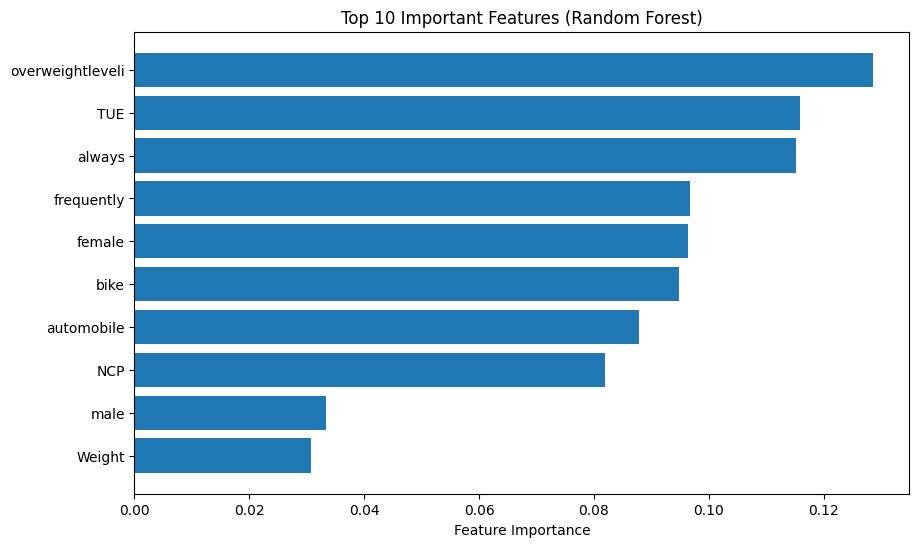

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Classification Report (Logistic Regression):
                    precision    recall  f1-score   support

insufficientweight       0.56      0.52      0.54       524
      normalweight       0.52      0.71      0.60       626
      obesitytypei       0.33      0.35      0.34       543
     obesitytypeii       0.78      0.65      0.71       657
    obesitytypeiii       0.62      1.00      0.76       804
  overweightleveli       0.32      0.19      0.24       484
 overweightlevelii       0.76      0.13      0.23       514

          accuracy                           0.55      4152
         macro avg       0.55      0.51      0.49      4152
      weighted avg       0.57      0.55      0.52      4152


Accuracy Score (Logistic Regression):
Accuracy: 0.55


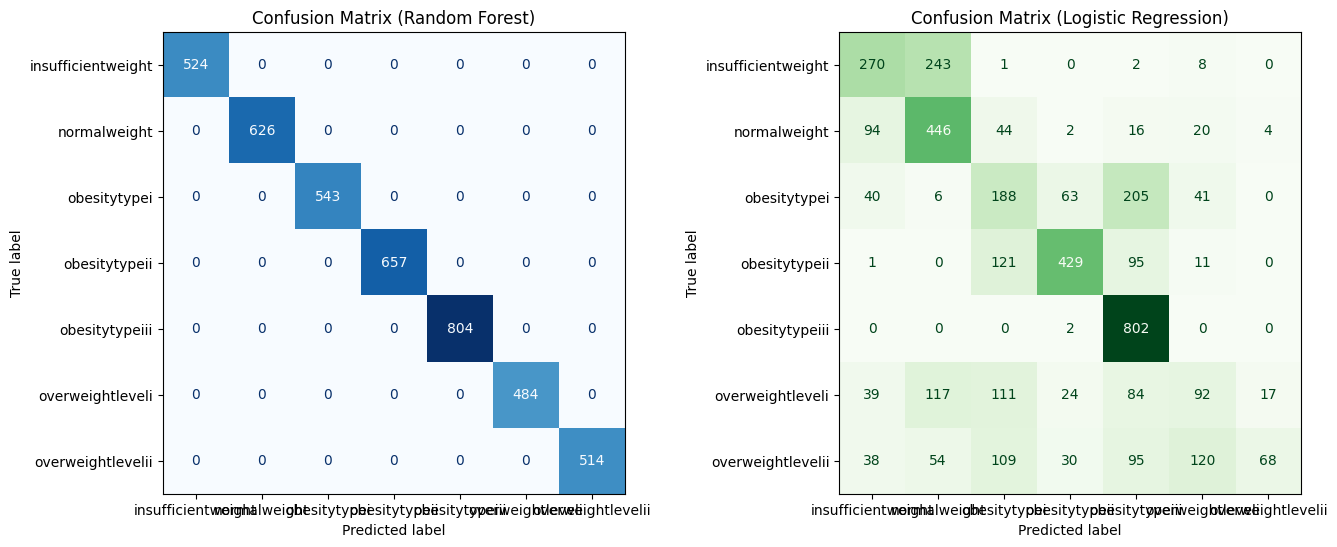

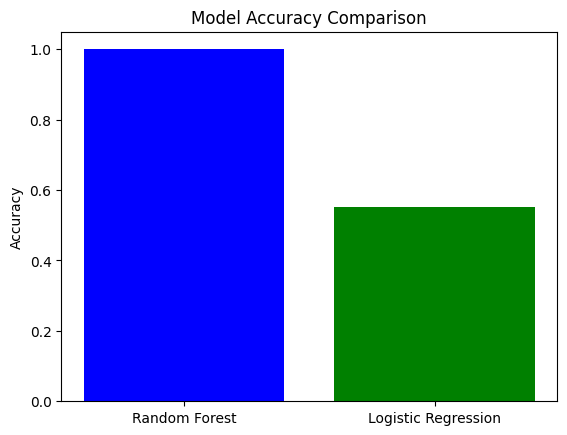

In [6]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from scipy.sparse import hstack

# Проверим, что целевая переменная присутствует
if 'NObeyesdad' not in updated_df_train.columns:
    raise KeyError("'NObeyesdad' столбец не найден в данных. Проверьте данные.")

# Создание финальной матрицы признаков
# Убираем текстовые колонки и целевую переменную из числовых данных
non_text_columns = updated_df_train.drop(columns=list(text_columns) + ['NObeyesdad'])

# Если текстовые колонки объединены в одну TF-IDF матрицу:
X_text_features = tfidf_matrix_combined  # Матрица TF-IDF признаков

# Объединяем текстовые и числовые признаки
X_combined = hstack([X_text_features, non_text_columns.values])

# Целевая переменная
y = updated_df_train['NObeyesdad']

# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Обучение модели случайного леса
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Предсказания для случайного леса
y_pred_rf = model.predict(X_test)

# Оценка модели случайного леса
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

print("\nAccuracy Score (Random Forest):")
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf:.2f}")

# График важности признаков
feature_importances = model.feature_importances_

# Если есть имена признаков, визуализируем важность
feature_names = list(non_text_columns.columns) + list(tfidf_vectorizer.get_feature_names_out())
sorted_idx = feature_importances.argsort()[-10:]  # Топ-10 признаков
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Top 10 Important Features (Random Forest)")
plt.show()

# Обучение линейной регрессии
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Предсказания для линейной регрессии
y_pred_lr = logistic_model.predict(X_test)

# Оценка модели линейной регрессии
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_lr))

print("\nAccuracy Score (Logistic Regression):")
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {accuracy_lr:.2f}")

# Построим матрицы ошибок для обеих моделей
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Матрица ошибок для случайного леса
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=model.classes_)
disp_rf.plot(ax=axes[0], cmap='Blues', colorbar=False)
axes[0].set_title("Confusion Matrix (Random Forest)")

# Матрица ошибок для линейной регрессии
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=model.classes_)
disp_lr.plot(ax=axes[1], cmap='Greens', colorbar=False)
axes[1].set_title("Confusion Matrix (Logistic Regression)")

plt.show()

# Сравнение точности моделей
plt.bar(["Random Forest", "Logistic Regression"], [accuracy_rf, accuracy_lr], color=["blue", "green"])
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()


In [ ]:
# Этап_3

In [14]:
# прогрузка данных
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Загрузка данных
categories = ['alt.atheism', 'comp.graphics', 'sci.space']  # Выбираем категории
newsgroups = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))

# Разделение данных на текстовые признаки (X) и целевые метки (y)
X = newsgroups.data
y = newsgroups.target

# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Токенизация текста
max_words = 20000  # Максимальное количество слов
max_len = 200      # Максимальная длина последовательности
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

# Преобразование текста в числовые последовательности
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Заполнение последовательностей до одинаковой длины
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len)

# Преобразование меток в one-hot encoding
from tensorflow.keras.utils import to_categorical
y_train_onehot = to_categorical(y_train, num_classes=len(categories))
y_test_onehot = to_categorical(y_test, num_classes=len(categories))


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

# Параметры модели
embedding_dim = 100  # Размерность эмбеддингов
max_words = 20000    # Максимальное количество слов
max_len = 200        # Максимальная длина последовательности

# Создание модели
model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(categories), activation='softmax')  # Количество классов
])

# Компиляция модели
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Подайте пример данных перед вызовом model.summary()
model.build(input_shape=(None, max_len))  # Указываем входную форму

# Вывод структуры модели
model.summary()


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 200, 100)            │       2,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 196, 128)            │          64,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_2               │ (None, 128)                 │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,081,027 (7.94 MB)

 Trainable params: 2,081,027 (7.94 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Обучение модели
history = model.fit(
    X_train_padded,
    y_train_onehot,
    batch_size=32,
    epochs=10,
    validation_data=(X_test_padded, y_test_onehot)
)


Epoch 1/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.3579 - loss: 1.0939 - val_accuracy: 0.4620 - val_loss: 1.0779
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4962 - loss: 1.0303 - val_accuracy: 0.7880 - val_loss: 0.7700
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7900 - loss: 0.5916 - val_accuracy: 0.8388 - val_loss: 0.4544
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9400 - loss: 0.2213 - val_accuracy: 0.8478 - val_loss: 0.3783
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9720 - loss: 0.0959 - val_accuracy: 0.8623 - val_loss: 0.3776
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9735 - loss: 0.0656 - val_accuracy: 0.8623 - val_loss: 0.3786
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9860 - loss: 0.0481 - val_accuracy: 0.8605 - val_loss: 0.3868
Epoch 8/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9814 - loss: 0.0376 - val_accuracy: 0.8514 - v

In [17]:
# Оценка точности модели на тестовых данных
loss, accuracy = model.evaluate(X_test_padded, y_test_onehot)
print(f"\nTest Accuracy: {accuracy:.2f}")

# Метрики классификации
import numpy as np
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_onehot, axis=1)

print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=categories))


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8667 - loss: 0.3909 

Test Accuracy: 0.86
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 

Classification Report:
               precision    recall  f1-score   support

  alt.atheism       0.88      0.82      0.85       173
comp.graphics       0.89      0.90      0.89       184
    sci.space       0.81      0.86      0.83       195

     accuracy                           0.86       552
    macro avg       0.86      0.86      0.86       552
 weighted avg       0.86      0.86      0.86       552



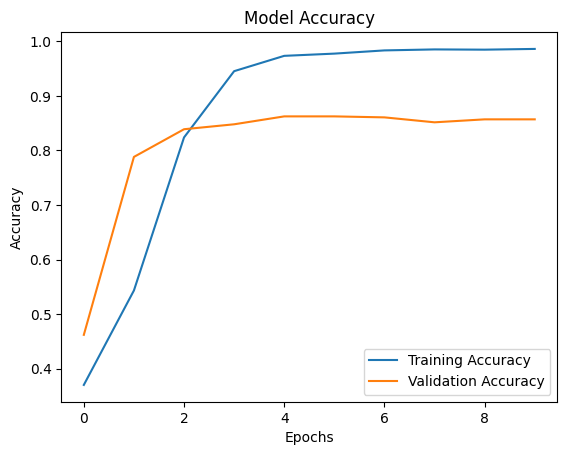

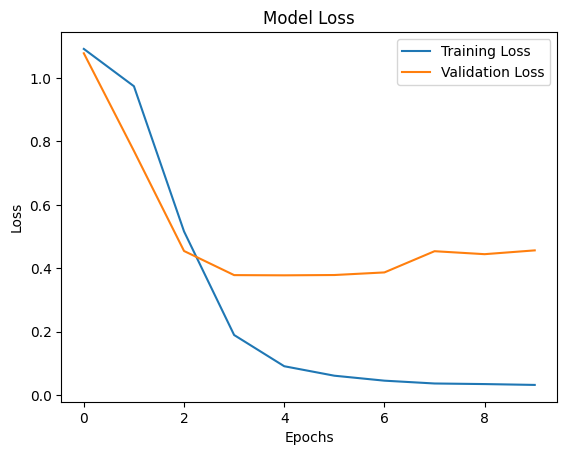

In [18]:
import matplotlib.pyplot as plt

# График точности
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# График функции потерь
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
